# **EDA AND CLASSIFICATION **
This kernel consists of three objectives:
1. Perform exploratory analysis  to extract meaningful insight from the data and identify the best features to be used for  modeling.  

2. Train, test, and refine various classification models to best predict which passengers survived.  The predictive algorithms to be trained are:
    - Logistic Regression  
    - Linear Support Vector Classifier (SVC)  
    - Kernel Support Vector Classifier (Kernel SVC)
    - K-Nearest Neighbors (KNN)
    - Decision Tree 
    - Random Forest
3.  Apply the best performing model to the test set.

### **TRAINING DATA PRE-PROCESSING** 
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables 

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [3]:
# Read data
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/classification_evaluation_mini_project/classification_lab_data.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,...,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,...,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,...,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,...,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,...,17653,17697,18068,1558,1278,1589,633,656,783,0


**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [4]:
# Data shape
print('data:',df.shape)

data: (23999, 24)


In [5]:
# View first few rows
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,...,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,...,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,...,76699,56738,39134,30000,4132,3410,2600,1800,1200,0


In [6]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                

In [7]:
# Rename a key column for convenience
df.rename(index=str, columns={"default payment next month": "DEFAULT"}, inplace=True)

**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

In [10]:
#look for any missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
DEFAULT,0,0.0
PAY_AMT6,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
PAY_0,0,0.0
PAY_2,0,0.0
PAY_3,0,0.0
PAY_4,0,0.0


No missing data. 

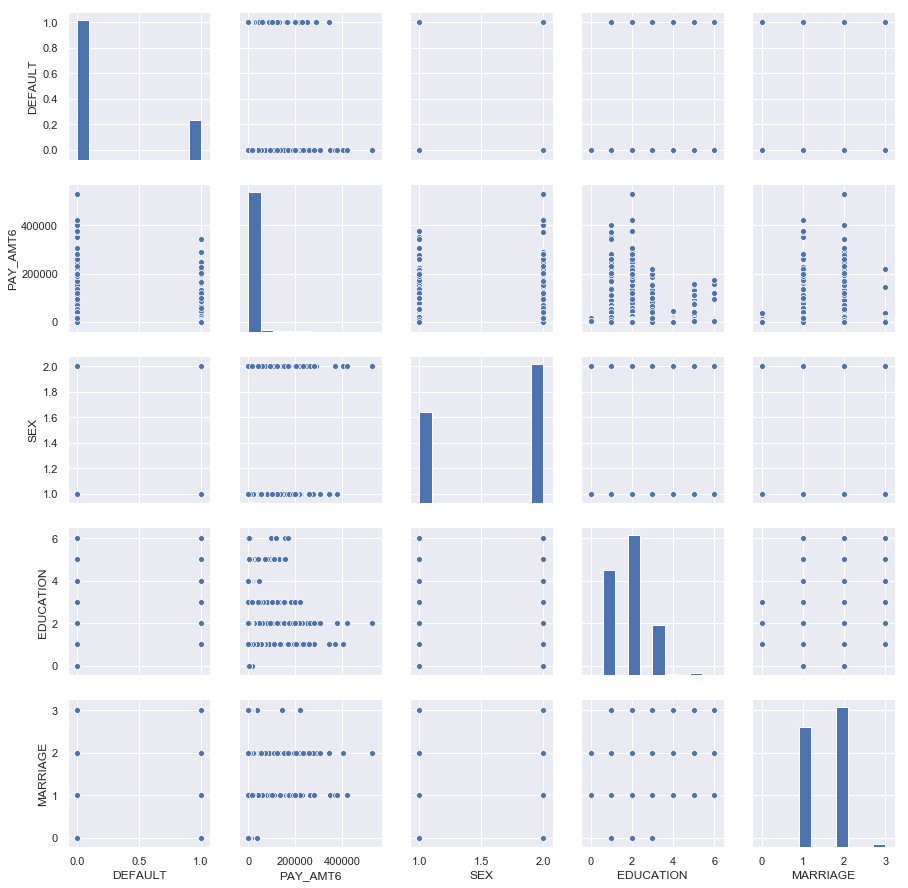

In [13]:
#use pairplot to look at selected variables with pairwise scatterplot. Looking for non-linear shapes to engineer.
sns.set()
cols = ['DEFAULT','PAY_AMT6','SEX','EDUCATION','MARRIAGE']
sns.pairplot(df[cols], height = 2.5)
plt.show();

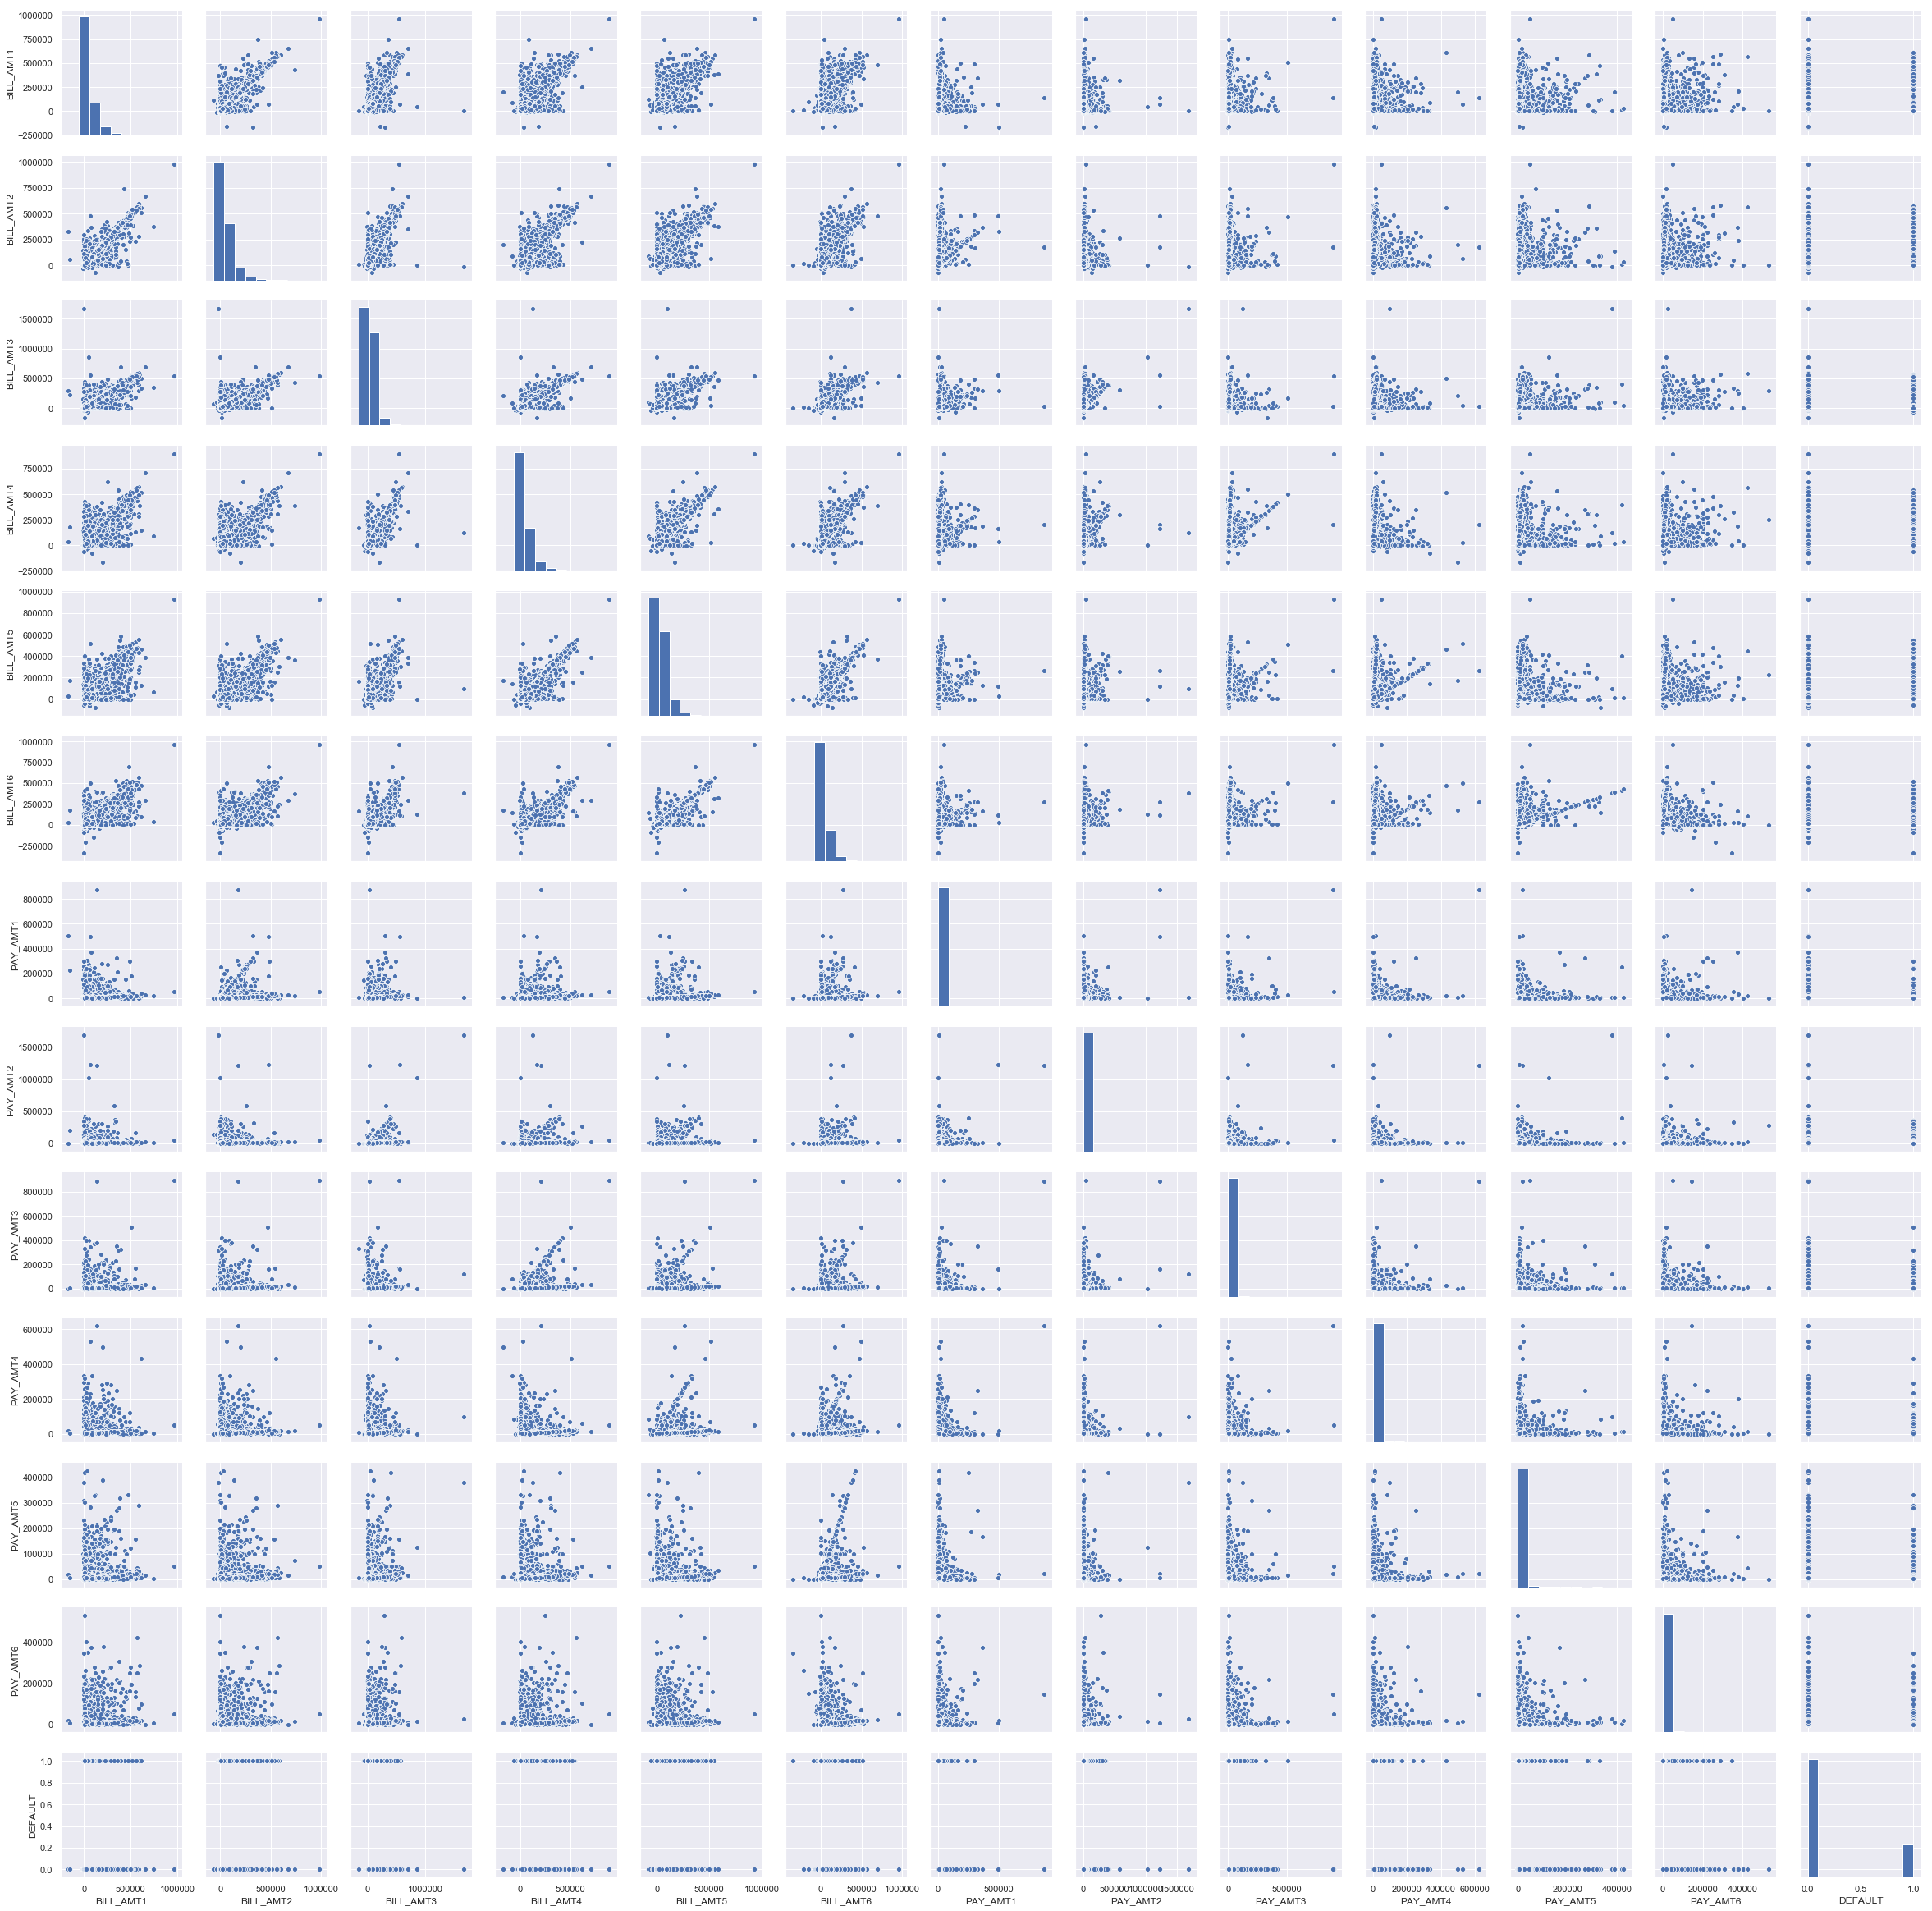

In [12]:
#use pairplot to look at selected variables with pairwise scatterplot. Looking for non-linear shapes to engineer.
sns.set()
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','DEFAULT']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [17]:
# look for outliers
z = np.abs(stats.zscore(df))
head(z)

NameError: name 'stats' is not defined

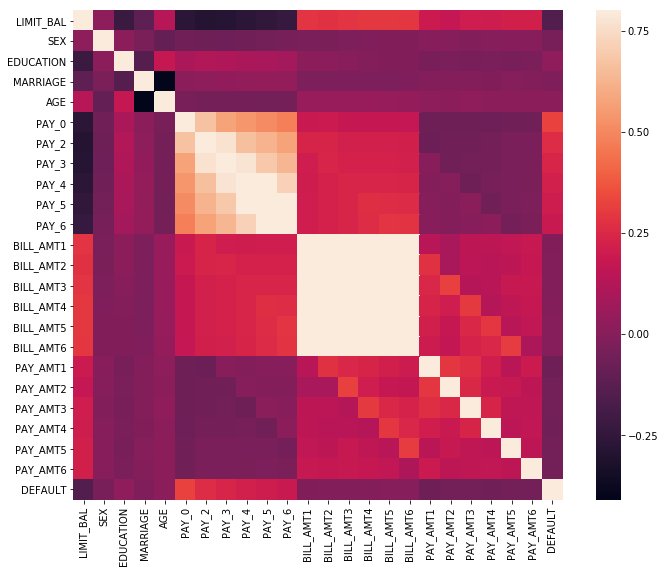

In [11]:
#use heatmap correlation matrix to view dependencies and correlation between variables
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
df.boxplot(['price'])

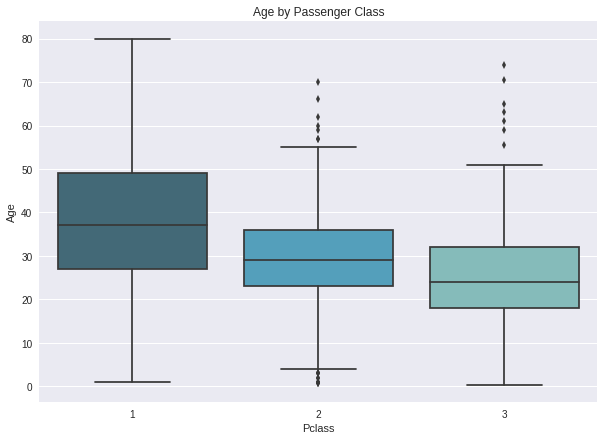

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.


In [8]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            
            return 29

        else:
            return 24

    else:
        return Age
    
# Apply the function to the Age column
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age, axis =1 )    


The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [9]:
# Remove Cabin feature
train_data.drop('Cabin', axis = 1, inplace = True)

Since there is only one missing value in Embarked, that observation can just be removed.

In [10]:
# Remove rows with missing data
train_data.dropna(inplace = True)

** Data Types**  
Next, I'll need to confirm that the variables are being assigned the correct data type to allow for easier analysis later on.

**Categorical Features**

In [11]:
# Data types
print(train_data.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(train_data.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


Non-Null Objects to Be Converted to Category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


Name and Ticket can be removed from the dataset as these features do not provide additional information about a passenger's liklihood of survival.    

The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.  

In [12]:
# Remove unnecessary columns  
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    train_data[colname] = train_data[colname].astype('category')

**Numeric Features**

In [13]:
# Numeric summary
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival.  The remaining variables are the correct data type. 

In [14]:
# Remove PassengerId
train_data.drop('PassengerId', inplace = True, axis = 1)

## **OBJECTIVE 1: EXPLORATORY DATA ANALYSIS**  

### **Target Variable**
'Survived' is our target as that is the dependent variable we are trying to predict.

Target Variable
Survived
0    549
1    340
Name: Survived, dtype: int64


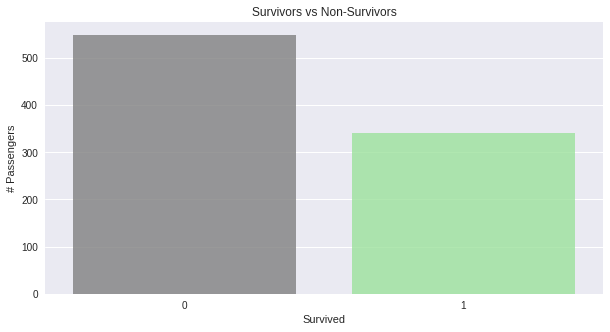

In [15]:
# Survival Count
print('Target Variable')
print(train_data.groupby(['Survived']).Survived.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(train_data['Survived'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()


> **Target Variable Insight**    
- The majority of passengers onboard did not survive.

### **Numeric Features**

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   889.0  29.019314  13.209814  0.42  22.0000  26.0000  36.5   80.0000
Fare  889.0  32.096681  49.697504  0.00   7.8958  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


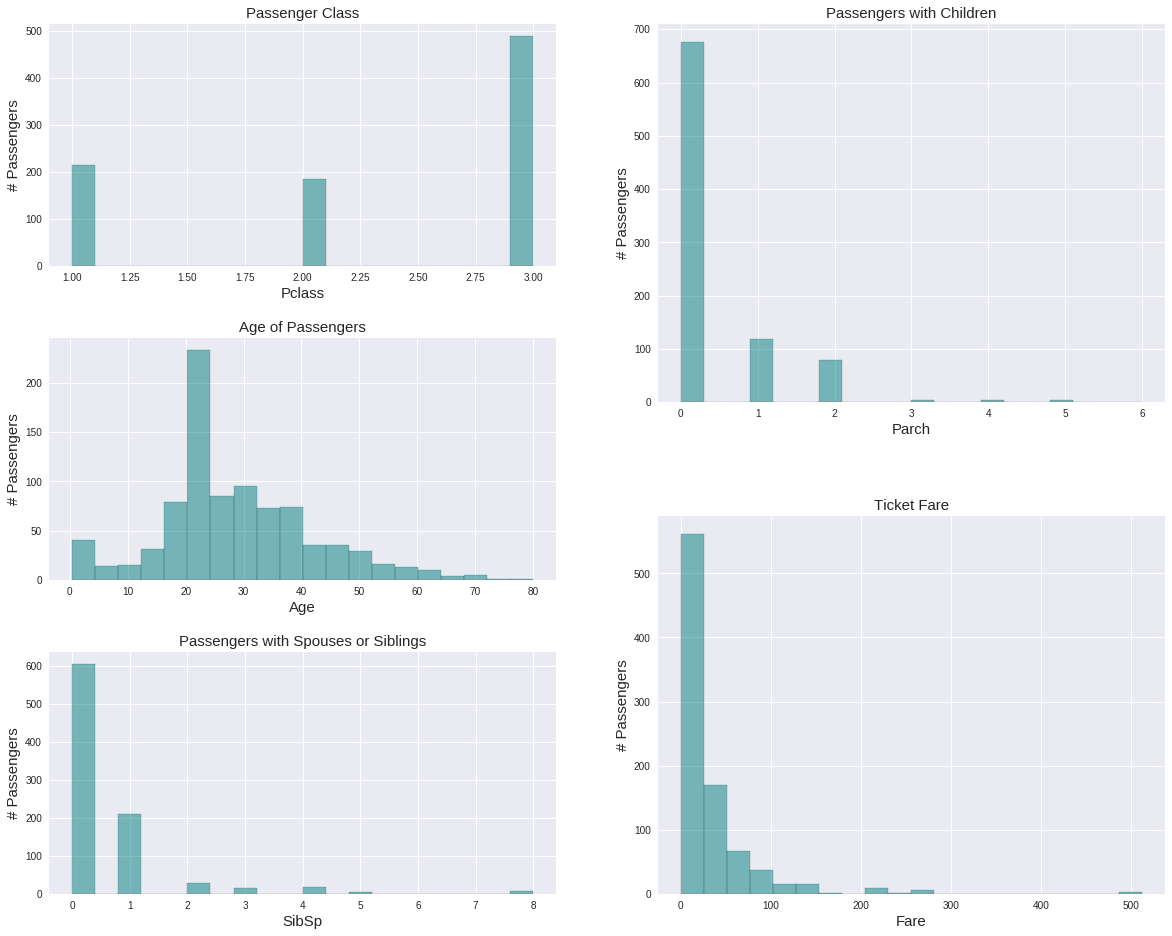

In [16]:
# Identify numeric features
print('Continuous Variables')
print(train_data[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_data.groupby('Pclass').Pclass.count())
print(train_data.groupby('SibSp').SibSp.count())
print(train_data.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(train_data['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(train_data['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(train_data['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(train_data['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(train_data['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()

>**Numeric Features Insights**    
- The majority of passengers aboard were third class  
- Most were single travelors with no spouses or children
- Passenger age appears to be bi-modal, with a small peak around 5 years of age and a larger peak around 25 years old.   This is an indication that the passenger age on board is distributed towards younger individuals with the median age being 26.
- The bulk of fare prices are under \$25 with a median fare of \$14.  However, the data is skewed to the right with outliers up to  \$500.  

### **Target vs Numeric Features**

### **Passenger Class**

Passenger Class Summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


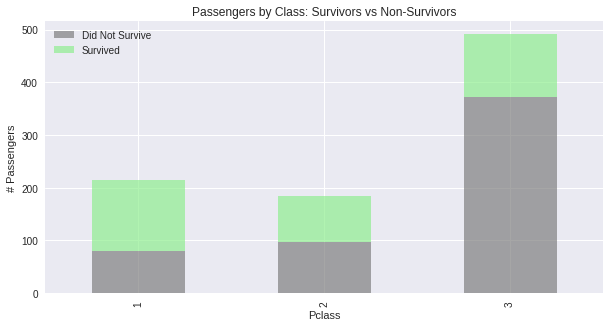

In [17]:
# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passenger class visualization
pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

>**Passenger Class Insight**  
- The majority of first-class passengers survived.  
- Most of the passengers in second and third class did not survive the sinking.  


### **Solo Passengers**

Passengers with Siblings or Spouse


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


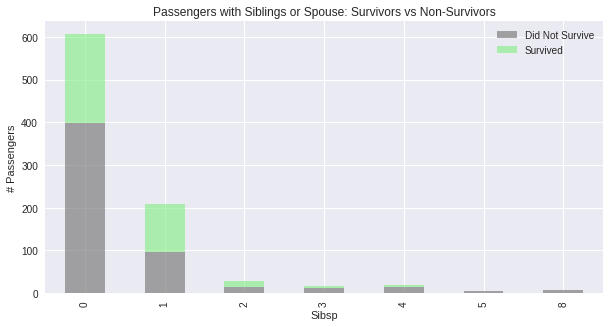

In [18]:
# SibSp Summary
print('Passengers with Siblings or Spouse')
print('\n')
print(train_data.groupby(['SibSp','Survived']).SibSp.count().unstack())

sibsp = train_data.groupby(['SibSp','Survived']).SibSp.count().unstack()
p2 = sibsp.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
p2.set_xlabel('Sibsp')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])
plt.show()

### **Passengers with Children**

Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


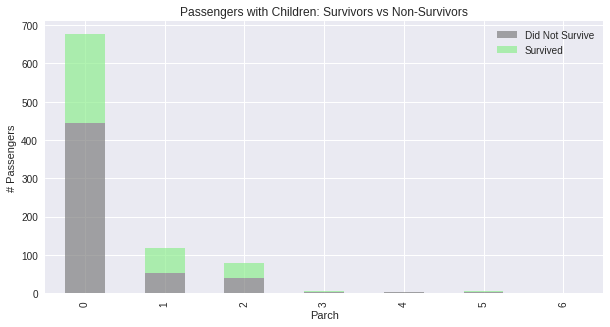

In [19]:
print(train_data.groupby(['Parch','Survived']).Parch.count().unstack())

parch = train_data.groupby(['Parch','Survived']).Parch.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p3.set_title('Passengers with Children: Survivors vs Non-Survivors')
p3.set_xlabel('Parch')
p3.set_ylabel('# Passengers')
p3.legend(['Did Not Survive','Survived'])
plt.show()

>**Passengers with Children Insight**
- The majority of passengers aboard did not have children
- Most passengers without children did not survive.   
- Passengers with one or two children survived half of the time 

### **Ticket Fare and Age of Passengers**

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


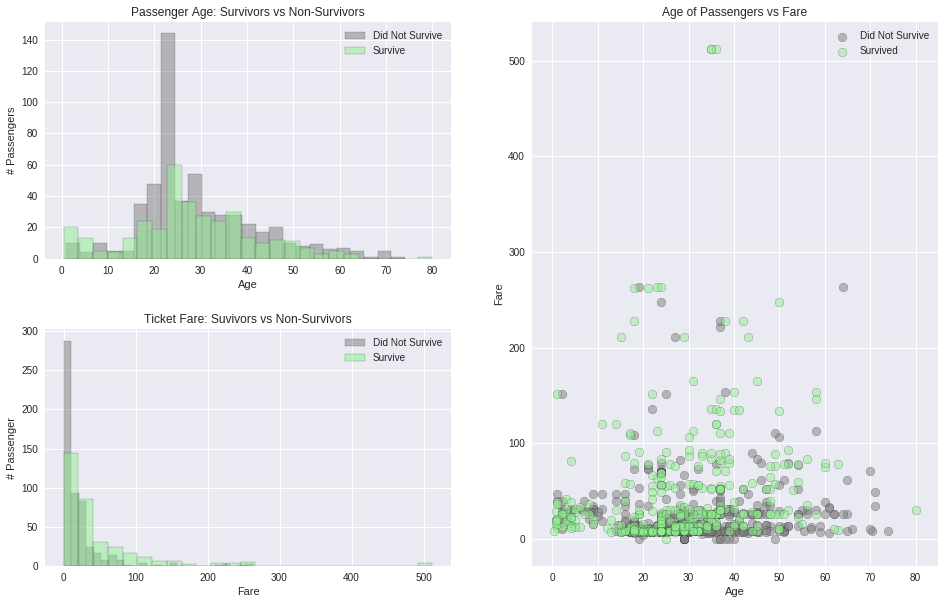

In [20]:
# titanic.hist(bins=10,figsize=(9,7),grid=False)
# Statistical summary of continuous variables 
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(train_data[train_data['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(train_data[train_data['Survived']==1][['Age','Fare']].describe().transpose())
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

>**Numeric Features Insight**  
- The majority of passengers under 10 years of age survived.     
- Most people that paid over \$100 for their ticket survived.  
- There were a fewer number of people that survived over the age of 40. 

### **Categorical Features**

In [21]:
# Identify categorical features
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

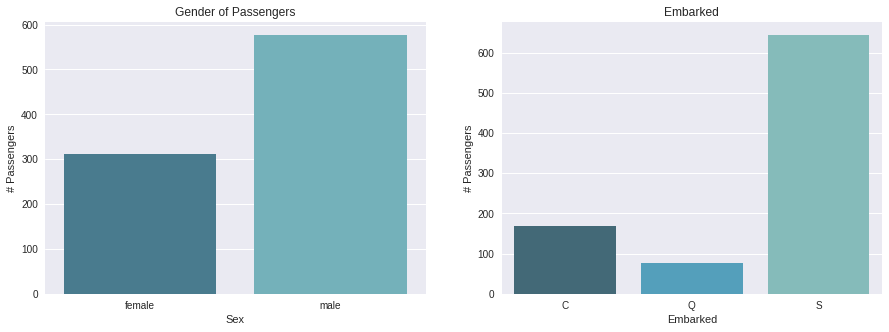

In [22]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'Sex', data = train_data, palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('# Passengers')
axes[0].set_title('Gender of Passengers')

# Plot [1]
sns.countplot(x = 'Embarked', data = train_data, palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('# Passengers')
axes[1].set_title('Embarked')

plt.show()

>**Categorical Features Insight**
- Passengers were primarily male
- Most passengers embarked from Southhampton


### **Target vs Categorical Features**

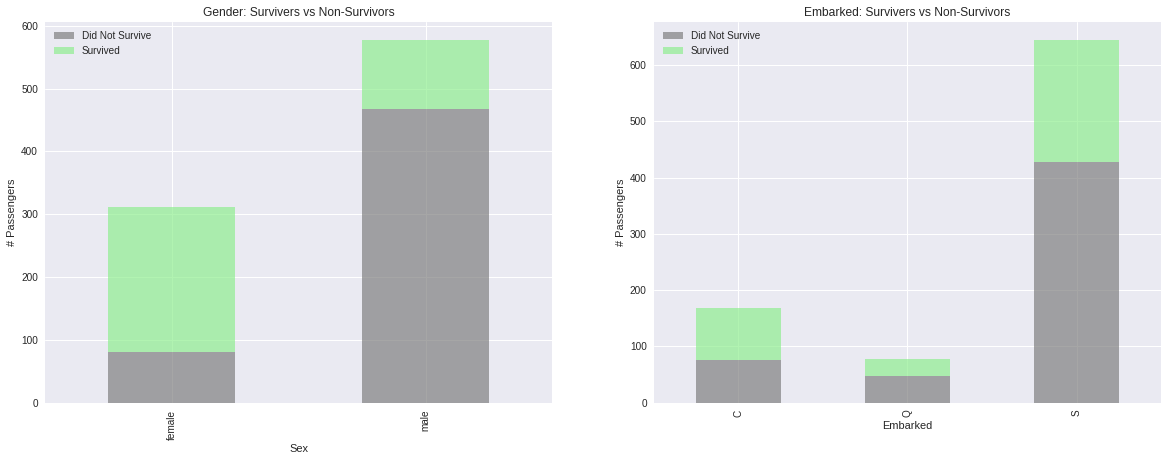

In [23]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

gender = train_data.groupby(['Sex','Survived']).Sex.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True, 
                   title = 'Gender: Survivers vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70, ax = axes[0])
p1.set_xlabel('Sex')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])


embarked = train_data.groupby(['Embarked','Survived']).Embarked.count().unstack()
p2 = embarked.plot(kind = 'bar', stacked = True, 
                    title = 'Embarked: Survivers vs Non-Survivors', 
                    color = ['grey','lightgreen'], alpha = .70, ax = axes[1])
p2.set_xlabel('Embarked')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])

plt.show()

>**Categorical Variable Insights**  
- Most of the female passengers on board survived.

### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [24]:
# Shape of train data
train_data.shape

(889, 8)

In [25]:
# Identify categorical features
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [26]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(train_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [27]:
# Add new dummy columns to data frame
train_data = pd.concat([train_data, sex, embarked], axis = 1)
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0


In [28]:
# Drop unecessary columns
train_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',train_data.shape)

# Confirm changes
train_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1



>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

In [ ]:
# Create matrix of features
X = df.drop('DEFAULT', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['DEFAULT'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [29]:
# Split data to be used in the models
# Create matrix of features
x = train_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = train_data['Survived'] # y is the column we're trying to predict

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

### ** LOGISTIC REGRESSION**

In [30]:
# Fit 
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Predict
y_pred_lreg = lreg.predict(x_test)

In [32]:
# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[98  9]
 [26 45]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.79      0.92      0.85       107
          1       0.83      0.63      0.72        71

avg / total       0.81      0.80      0.80       178

--------------------------------------------------------------------------------
Accuracy 80.34 %


### **Interpretation**  
**Accuracy**  
80% of the model's predictions are correct.

**Precision**  
Precision is  measure of how precise the model's predictions are.  When the model predicts a passenger survived, that person actually *did* survive 81% of the time.

**Recall (Sensitivity)**  
If there a passenger that survived is present in the test set, the model is able to identify (recall) it 81% of the time.    

**F1 Score**  
F1 Score is the best of both worlds as it is a weighted average of precision and recall. An F1 Score of 80% means that 80% of the time:

- when the model predicts someone survived, you can be confident that person actually did survive and it is not a false alarm.
- when there is a actual surivior in the dataset, the model is able to detect it
In classification problems where there are more than two labels that apply, accuracy is less intuitive and the F1 Score is a better measure of a model's performance.



## ** LINEAR SUPPORT VECTOR CLASSIFIER**

In [33]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
# Predict
y_pred_svc = svc.predict(x_test)

In [35]:
# Score It
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[87 20]
 [37 34]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.70      0.81      0.75       107
          1       0.63      0.48      0.54        71

avg / total       0.67      0.68      0.67       178

--------------------------------------------------------------------------------
Accuracy 67.98 %


** SVC Parameter Tuning with GridSearch**  
The SVC did not perform as well as the Logistic Regression, indicating that this model's parameters need to be tuned for better performance. Finding the right parameters (spefically, what C or gamma values to use) is a tricky task. But luckily, we just try different combinations and see what works best. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV (CV stands for cross-validation).  

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.       

**Parameters**  
**C**  
controls the cost of missclassification on the training data.  
High C: low bias (because you penalized the cost of misclassification alot) and high variance.  
Low C: high bias (not penalizing the cost of missclassficiation as much) and low variance.  

**Gamma**  
Low gamma: means Gaussian with a large variance  
High gamma: high bias and low variance  

You would treat the GridSearchCV object just like you would a normal model.  

In [36]:
# Create parameter grid
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [37]:
# Fit
# Import
from sklearn.model_selection import GridSearchCV

# Instantiate grid object
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 1)#verbose is the text output describing the process

# Fit to training data
grid.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

'Fitting' here is a bit more involved then usual:
- First, it runs the same loop with cross-validation to find the best parameter combination.   
- Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation) to build a single new model using the best parameter setting.  

We can then inspect the best parameters found by GridSearchCV in the bestparams attribute, and the best estimator in the best estimator attribute.  

In [38]:
# Call best_params attribute
print(grid.best_params_)
print('\n')
# Call best_estimators attribute
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [39]:
# Predict using best parameters
y_pred_grid = grid.predict(x_test)

In [40]:
# Score It
# Confusion Matrix
print('SVC with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_grid))
print('--'*40)
# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_grid))

# Accuracy
print('--'*40)
svc_grid_accuracy = round(accuracy_score(y_test, y_pred_grid)*100,2)
print('Accuracy',svc_grid_accuracy,'%')

SVC with GridSearchCV


Confusion Matrix
[[89 18]
 [17 54]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.84      0.83      0.84       107
          1       0.75      0.76      0.76        71

avg / total       0.80      0.80      0.80       178

--------------------------------------------------------------------------------
Accuracy 80.34 %


By adjusting the parameters with GridSearchCV, the model performed much better in precision, recall, and accuracy than the original SVC (an increase of 8%).  However, it still did not outperform the Logistic Regression which is 1% higher in precision.

### **KERNEL SUPPORT VECTOR CLASSIFIER**  
There are functions, called kernels, that can take a low dimensional feature space and map it to a very high dimensional space so as to transform a non-linearably separable problem into a seperable one. 

Thus, by finding the best linear separator between the different classes and applying the 'kernel trick' in a high dimensional space, you get a very powerful system to set data sets apart where the division line might be non-linear.

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [42]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate model object
ksvc= SVC(kernel = 'rbf', random_state = 0)

# Fit on training data
ksvc.fit(x_train_sc, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
# Predict
y_pred_ksvc = ksvc.predict(x_test_sc)

In [44]:
# Score it
print('Kernel SVC')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ksvc))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_ksvc))

# Accuracy
print('--'*40)
ksvc_accuracy = round(accuracy_score(y_test,y_pred_ksvc)*100,1)
print('Accuracy',ksvc_accuracy,'%')

Kernel SVC


Confusion Matrix
[[102   5]
 [ 22  49]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       107
          1       0.91      0.69      0.78        71

avg / total       0.86      0.85      0.84       178

--------------------------------------------------------------------------------
Accuracy 84.8 %


### **K-NEAREST NEIGHBORS**   

K-Nearest Neighbors (KNN) is used to classify new data points based on ‘distance’ to known data on a scatter plot with a two step process: 
1.  Find K nearest neighbors based on your distance metric
2.  Let them all vote on the classification 


KNN is different from the previous classifiers in that it requires variables to be standardized before the model is trained.  This is because the KNN classifier predicts the class of a given test observation by identifying the observations nearest to it.  Thus, the scale of the variables matters. 

Any variables that are on a large scale will have a much larger effect on the distance between the observations (and hence, on the KNN classifier)  than variables that are on a small scale. Therefore, everything should be standardized to the same scale when using k-nearest neighbors to classify.

In [45]:
# Standardize the Variables

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create instance of standard scaler
scaler = StandardScaler()

# Fit scaler object to feature columns
scaler.fit(train_data.drop('Survived', axis = 1)) # Everything but target variable 

# Use scaler object to do a transform columns
scaled_features = scaler.transform(train_data.drop('Survived', axis = 1)) # performs the standardization by centering and scaling
scaled_features

array([[ 0.82520863, -0.53167023,  0.43135024, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.68023223,  0.43135024, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.22869462, -0.47519908, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ..., 
       [ 0.82520863, -0.38018243,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.22869462, -0.47519908, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.22576881, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697]])

In [46]:
# Use scaled features variable to re-create a features dataframe
df_feat = pd.DataFrame(scaled_features, columns = train_data.columns[:-1])

In [47]:
# Split
# Import
from sklearn.model_selection import train_test_split

# Create matrix of features
x = df_feat

# Create target variable
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [48]:
# Fit
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit to training data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
# Predict
y_pred_knn = knn.predict(x_test)

In [50]:
# Score it
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Accuracy
print('--'*40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[80 27]
 [18 53]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.82      0.75      0.78       107
          1       0.66      0.75      0.70        71

avg / total       0.75      0.75      0.75       178

--------------------------------------------------------------------------------
Accuracy 74.7 %


**KNN Parameter Tuning**  
With a precision of 72.5%, the model's performance is accepatable using k = 1, but could be improved by choosing a better k value.  

The best way to identify the optimal k value is with the 'Elbow' method, which interates many models using different k values and plots their error rates. The k with the lowest error rate is the optimal value we want to use.  

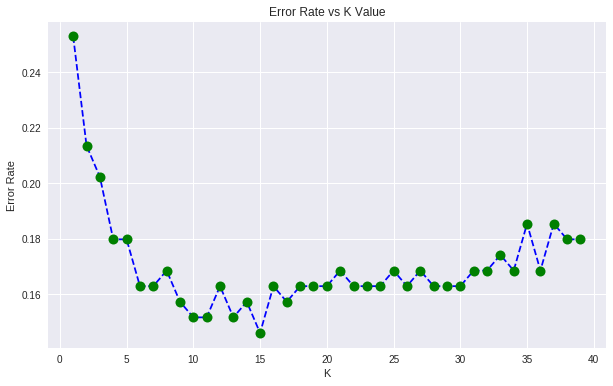

In [51]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


At k=13, the error rate is at it's lowest, making 13 the optimal value for k.  I will retrain and test the model accordingly.  

In [52]:
# Fit new KNN
# Create model object
knn = KNeighborsClassifier(n_neighbors = 13)

# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [53]:
# Predict new KNN
y_pred_knn_op = knn.predict(x_test)

In [54]:
# Score it with new KNN
print('K-Nearest Neighbors(KNN)')
print('k = 13')

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*40)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 13


[[100   7]
 [ 20  51]]
--------------------------------------------------------------------------------
Classfication Report              precision    recall  f1-score   support

          0       0.83      0.93      0.88       107
          1       0.88      0.72      0.79        71

avg / total       0.85      0.85      0.85       178

--------------------------------------------------------------------------------
Accuracy 84.83 %


 By using the elbow method to find the optimal k value, the model's accuracy and precision improved to 83% and f1-score jumped to 82%. This performance also beats out that of the other models trained so far (Logistic Regression and SVC).

### ** DECISION TREE**

In [55]:
# Fit
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
# Predict
y_pred_dtree = dtree.predict(x_test)

In [57]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[86 21]
 [16 55]]
--------------------------------------------------------------------------------
Classification Report              precision    recall  f1-score   support

          0       0.84      0.80      0.82       107
          1       0.72      0.77      0.75        71

avg / total       0.80      0.79      0.79       178

--------------------------------------------------------------------------------
Accuracy 79.21 %


With an accuracy of just 79.2%, the decision tree performed much worse than the logistic regression.  In fact, the primary weakness of a single decision tree is that it doesn't tend to have the best predictive accuracy in general. This is partially due to the high variance - different splits in the training data can lead to very different trees. To improve performance, we can create an ensemble of decision trees with bootstrapped samples of the training set (sampling from the training set with replacement) and using random splits on the features.  

### **RANDOM FOREST**

In [58]:
# Fit
# Import model object
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
# Predict
y_pred_rfc = rfc.predict(x_test)

In [60]:
# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[93 14]
 [17 54]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.85      0.87      0.86       107
          1       0.79      0.76      0.78        71

avg / total       0.82      0.83      0.83       178

--------------------------------------------------------------------------------
Accuracy 82.58 %


 ### **AND THE WINNER IS...**
K-Nearest Neighbors with K = 13 with the highest overall performance in accuracy, recall, and precision (~ 83% across the board).  The other classification models also performed well, but were a few percentage points lower in their evaluation metrics.  Additional parameter tuning could improve each model's performance even more, but this initial analysis proved to be a good starting point.  

In [61]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 'Kernel SVC', 
               'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Score': [logreg_accuracy, svc_grid_accuracy, ksvc_accuracy, 
               knn_op_accuracy, dtree_accuracy, rf_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,K-Nearest Neighbors,84.83
2,Kernel SVC,84.80
5,Random Forest,82.58
0,Logistic Regression,80.34
1,Linear SVC,80.34
4,Decision Tree,79.21


 ## **OBJECTIVE 3: CONTEST SUBMISSION**  
Now that I've determined the best performing models for this data problem, I will apply KNN to the test data for the Kaggle submission.  

But before I can use the test data, I need to perform the same pre-processing procedures used on the training data above. Again, I'll need to address missing data and encoding categorical variables to the correct data type.


** TEST DATA PRE-PROCESSING**

In [62]:
# Load test data
test_data = pd.read_csv('../input/test.csv')

# Test data info
test_data.info()

# Test data shape
print('shape',test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
shape (418, 11)


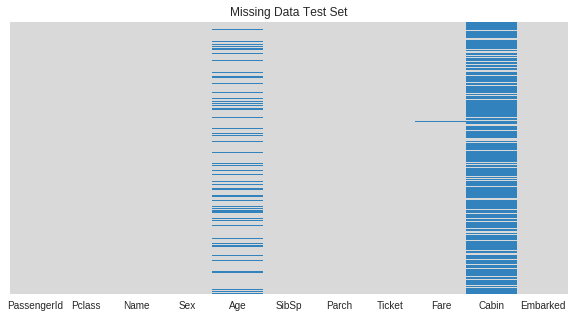

In [63]:
# Heatmap
sns.heatmap(test_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data Test Set')
plt.show()

In [64]:
# Missing Data
# Impute Age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            
            return 29

        else:
            return 24

    else:
        return Age
    
# Apply the function to the Age column
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age, axis =1 )    

# Drop cabin feature
test_data = test_data.drop(['Cabin'], axis = 1)

# Impute Fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Confirm changes
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [65]:
# Remove unecessary columns
test_data = test_data.drop(['Name','Ticket'],axis = 1)
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [66]:
# Identify categorical variables
test_data.select_dtypes(['object']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [67]:
# Convert categorical variables into 'dummy' or indicator variables
testsex = pd.get_dummies(test_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
testembarked = pd.get_dummies(test_data['Embarked'], drop_first = True)

# Add new dummy columns to data frame
test_data = pd.concat([test_data, testsex, testembarked], axis = 1)

# Drop unecessary columns
test_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [68]:
# Test data shape
print(test_data.shape)

# Confirm changes
test_data.head()

(418, 9)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [69]:
# Split
x_train2 = train_data.drop("Survived", axis=1)
y_train2 = train_data["Survived"]
x_test2  = test_data.drop("PassengerId", axis=1).copy()
print('x_train shape', x_train2.shape)
print('y_train shape',y_train2.shape)
print('x_test shape', x_test2.shape)

x_train shape (889, 8)
y_train shape (889,)
x_test shape (418, 8)


In [70]:
# Fit new KNN
# Create model object
knn2 = KNeighborsClassifier(n_neighbors = 13)

# Fit new KNN on training data
knn2.fit(x_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [71]:
# Predict 
y_pred_knn_op2 = knn2.predict(x_test2)

In [72]:
# Create contest submission
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_knn_op2
    })

submission.to_csv('mySubmission.csv', index=False)